# ★ 所有图形绘制+最终综合看板制作均通过Tableau Professional Edition

# 以便后期进行数据对比分析

# 一、求出GMV，订单量，ARPU值

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df1=pd.read_csv('olist_order_payments_dataset.csv')
df1.sort_values(by='order_id',inplace=True)
df1.set_index('order_id',inplace=True)
df1.head()

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04


In [3]:
df2=pd.read_csv('olist_orders_dataset.csv')
df2.sort_values(by='order_id',inplace=True)
df2.set_index('order_id',inplace=True)
df2.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [4]:
df3=pd.DataFrame(df1['payment_value']).join(df2[['customer_id','order_purchase_timestamp']],how='inner')
df4=df3.sort_values(by='order_purchase_timestamp')
df4.head()

,payment_value,customer_id,order_purchase_timestamp
order_id,,,
2e7a8482f6fb09756ca50c10d7bfc047,136.23,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
e5fa5a7210941f7d56d0208e4e071d35,75.06,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34
809a282bbd5dbcabb6f2f724fca862ec,40.95,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19
71303d7e93b399f5bcd537d124c0bcfa,109.34,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52
3b697a20d9e427646d92567910af6d57,45.46,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50


In [5]:
df5=pd.DataFrame(pd.to_datetime(df4['order_purchase_timestamp'],errors='coerce',box=False,format='%Y-%m-%d'))
df5.head()

,order_purchase_timestamp
order_id,
2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19
e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34
809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19
71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52
3b697a20d9e427646d92567910af6d57,2016-10-03 09:44:50


In [6]:
df6=pd.concat([pd.DataFrame(df4[['payment_value','customer_id']]),pd.DataFrame(df5['order_purchase_timestamp'])],axis=1)
df6.head()

,payment_value,customer_id,order_purchase_timestamp
order_id,,,
2e7a8482f6fb09756ca50c10d7bfc047,136.23,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
e5fa5a7210941f7d56d0208e4e071d35,75.06,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34
809a282bbd5dbcabb6f2f724fca862ec,40.95,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19
71303d7e93b399f5bcd537d124c0bcfa,109.34,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52
3b697a20d9e427646d92567910af6d57,45.46,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50


In [7]:
df6['order_year_month'] = df6['order_purchase_timestamp'].map(lambda x: x.year*100 + x.month)
df6.head()

,payment_value,customer_id,order_purchase_timestamp,order_year_month
order_id,,,,
2e7a8482f6fb09756ca50c10d7bfc047,136.23,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,201609
e5fa5a7210941f7d56d0208e4e071d35,75.06,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,201609
809a282bbd5dbcabb6f2f724fca862ec,40.95,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19,201609
71303d7e93b399f5bcd537d124c0bcfa,109.34,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,201610
3b697a20d9e427646d92567910af6d57,45.46,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,201610


df7：求解出bymonth_totalpayment(每月GMV)、bymonth_ordernum（每月订单量）

In [8]:
df7=df6.groupby('order_year_month')['payment_value'].agg(['sum','count'])
df7.rename(columns={'sum':'bymonth_totalpayment','count':'bymonth_ordernum'},inplace=True)
df7.head()

,bymonth_totalpayment,bymonth_ordernum
order_year_month,,
201609,252.24,3
201610,59090.48,342
201612,19.62,1
201701,138488.04,850
201702,291908.01,1886


In [9]:
#df8：求出每月顾客数
df8=pd.DataFrame(df6.groupby('order_year_month')['customer_id'].nunique())
df8.rename(columns={'customer_id':'bymonth_unique_customer_num'},inplace=True)
df8.head()

,bymonth_unique_customer_num
order_year_month,
201609,3
201610,324
201612,1
201701,800
201702,1780


In [10]:
df9=df7.join(df8,how='left')
df9.head()

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num
order_year_month,,,
201609,252.24,3,3
201610,59090.48,342,324
201612,19.62,1,1
201701,138488.04,850,800
201702,291908.01,1886,1780


df9：将bymonth_totalpayment(每月GMV)、bymonth_ordernum（每月订单量）两列相除，求解出bymonth_ARPU（每月ARPU值）

In [11]:
df9['bymonth_ARPU']=df9['bymonth_totalpayment']/df9['bymonth_unique_customer_num']
df9.reset_index(inplace=True)
df9.head()

,order_year_month,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU
0,201609,252.24,3,3,84.080000
1,201610,59090.48,342,324,182.378025
2,201612,19.62,1,1,19.620000
3,201701,138488.04,850,800,173.110050
4,201702,291908.01,1886,1780,163.993264


# 二、RFM模型（用户分层）

In [12]:
p3=df6
p3.head()

,payment_value,customer_id,order_purchase_timestamp,order_year_month
order_id,,,,
2e7a8482f6fb09756ca50c10d7bfc047,136.23,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,201609
e5fa5a7210941f7d56d0208e4e071d35,75.06,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,201609
809a282bbd5dbcabb6f2f724fca862ec,40.95,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19,201609
71303d7e93b399f5bcd537d124c0bcfa,109.34,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,201610
3b697a20d9e427646d92567910af6d57,45.46,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,201610


In [13]:
p3.reset_index(inplace=True)
p3.set_index(keys='customer_id',inplace=True)
p3.head()

,order_id,payment_value,order_purchase_timestamp,order_year_month
customer_id,,,,
08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,136.23,2016-09-04 21:15:19,201609
683c54fc24d40ee9f8a6fc179fd9856c,e5fa5a7210941f7d56d0208e4e071d35,75.06,2016-09-05 00:15:34,201609
622e13439d6b5a0b486c435618b2679e,809a282bbd5dbcabb6f2f724fca862ec,40.95,2016-09-13 15:24:19,201609
b106b360fe2ef8849fbbd056f777b4d5,71303d7e93b399f5bcd537d124c0bcfa,109.34,2016-10-02 22:07:52,201610
355077684019f7f60a031656bd7262b8,3b697a20d9e427646d92567910af6d57,45.46,2016-10-03 09:44:50,201610


In [14]:
p3['order_purchase_timestamp'].describe()

count                  103886
unique                  98874
top       2017-04-20 12:45:34
freq                       29
first     2016-09-04 21:15:19
last      2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

In [15]:
p4=pd.DataFrame(p3['order_purchase_timestamp'].astype(str).str[0:10])
p4.rename(columns={'order_purchase_timestamp':'order_datetime'},inplace=True)
p4.head()

,order_datetime
customer_id,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05
622e13439d6b5a0b486c435618b2679e,2016-09-13
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02
355077684019f7f60a031656bd7262b8,2016-10-03


In [16]:
p4['order_datetime']=pd.to_datetime(p4['order_datetime'],errors='coerce')
p4.head()

,order_datetime
customer_id,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05
622e13439d6b5a0b486c435618b2679e,2016-09-13
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02
355077684019f7f60a031656bd7262b8,2016-10-03


In [17]:
p4['order_datetime'].describe()

count                  103886
unique                    633
top       2017-11-24 00:00:00
freq                     1214
first     2016-09-04 00:00:00
last      2018-10-17 00:00:00
Name: order_datetime, dtype: object

In [18]:
p4['R']=''
p4['R_Score']=''
p4.head()

,order_datetime,R,R_Score
customer_id,,,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04,,
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05,,
622e13439d6b5a0b486c435618b2679e,2016-09-13,,
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02,,
355077684019f7f60a031656bd7262b8,2016-10-03,,


In [19]:
p4['R']=p4['order_datetime'].describe().iloc[5]-p4['order_datetime']
p4.head()

,order_datetime,R,R_Score
customer_id,,,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04,773 days,
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05,772 days,
622e13439d6b5a0b486c435618b2679e,2016-09-13,764 days,
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02,745 days,
355077684019f7f60a031656bd7262b8,2016-10-03,744 days,


In [20]:
p4['R']=pd.DataFrame(p4['R'].astype('timedelta64[D]').astype(int))
p4.head()

,order_datetime,R,R_Score
customer_id,,,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04,773,
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05,772,
622e13439d6b5a0b486c435618b2679e,2016-09-13,764,
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02,745,
355077684019f7f60a031656bd7262b8,2016-10-03,744,


In [21]:
p4['R'].describe()

count    103886.000000
mean        291.727779
std         154.035123
min           0.000000
25%         167.000000
50%         273.000000
75%         402.000000
max         773.000000
Name: R, dtype: float64

In [22]:
p4['R_Score']=(1-(p4['R']-p4['R'].describe().iloc[3])/(p4['R'].describe().iloc[7]-p4['R'].describe().iloc[3]))*100
p4.head()

,order_datetime,R,R_Score
customer_id,,,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04,773,0.000000
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05,772,0.129366
622e13439d6b5a0b486c435618b2679e,2016-09-13,764,1.164295
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02,745,3.622251
355077684019f7f60a031656bd7262b8,2016-10-03,744,3.751617


In [23]:
p5=p4
p5.head()

,order_datetime,R,R_Score
customer_id,,,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04,773,0.000000
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05,772,0.129366
622e13439d6b5a0b486c435618b2679e,2016-09-13,764,1.164295
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02,745,3.622251
355077684019f7f60a031656bd7262b8,2016-10-03,744,3.751617


In [24]:
p5.reset_index(inplace=True)
p6=pd.DataFrame(p5['customer_id'].value_counts())
p6.head()

,customer_id
9af2372a1e49340278e7c1ef8d749f34,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,26
b246eeed30b362c09d867b9e598bee51,22
270c23a11d024a44c896d1894b261a83,21
13aa59158da63ba0e93ec6ac2c07aacb,19


In [25]:
p6.reset_index(inplace=True)
p6.rename(columns={'index':'customer_id','customer_id':'F'},inplace=True)
p6.set_index(keys='customer_id',inplace=True)
p6.head()

,F
customer_id,
9af2372a1e49340278e7c1ef8d749f34,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,26
b246eeed30b362c09d867b9e598bee51,22
270c23a11d024a44c896d1894b261a83,21
13aa59158da63ba0e93ec6ac2c07aacb,19


In [26]:
p6['F'].describe()

count    99440.000000
mean         1.044710
std          0.381166
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         29.000000
Name: F, dtype: float64

In [27]:
p6['F_Score']=''
p6['F_Score']=((p6['F']-p6['F'].describe().iloc[3])/(p6['F'].describe().iloc[7]-p6['F'].describe().iloc[3]))*100
p6.head()

,F,F_Score
customer_id,,
9af2372a1e49340278e7c1ef8d749f34,29,100.000000
92cd3ec6e2d643d4ebd0e3d6238f69e2,26,89.285714
b246eeed30b362c09d867b9e598bee51,22,75.000000
270c23a11d024a44c896d1894b261a83,21,71.428571
13aa59158da63ba0e93ec6ac2c07aacb,19,64.285714


In [28]:
p7=p3.reset_index()
p7.head()

,customer_id,order_id,payment_value,order_purchase_timestamp,order_year_month
0,08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,136.23,2016-09-04 21:15:19,201609
1,683c54fc24d40ee9f8a6fc179fd9856c,e5fa5a7210941f7d56d0208e4e071d35,75.06,2016-09-05 00:15:34,201609
2,622e13439d6b5a0b486c435618b2679e,809a282bbd5dbcabb6f2f724fca862ec,40.95,2016-09-13 15:24:19,201609
3,b106b360fe2ef8849fbbd056f777b4d5,71303d7e93b399f5bcd537d124c0bcfa,109.34,2016-10-02 22:07:52,201610
4,355077684019f7f60a031656bd7262b8,3b697a20d9e427646d92567910af6d57,45.46,2016-10-03 09:44:50,201610


In [29]:
p8=pd.DataFrame(p7.groupby('customer_id')['payment_value'].agg('sum'))
p8.rename(columns={'payment_value':'M'},inplace=True)
p8.sort_values(by=['M'],ascending=False,inplace=True)
p8.head()

,M
customer_id,
1617b1357756262bfa56ab541c47bc16,13664.08
ec5b2ba62e574342386871631fafd3fc,7274.88
c6e2731c5b391845f6800c97401a43a9,6929.31
f48d464a0baaea338cb25f816991ab1f,6922.21
3fd6777bbce08a352fddd04e4a7cc8f6,6726.66


In [30]:
p8['M'].describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: M, dtype: float64

In [31]:
p8['M_Score']=''
p8['M_Score']=((p8['M']-p8['M'].describe().iloc[3])/(p8['M'].describe().iloc[7]-p8['M'].describe().iloc[3]))*100
p8.head()

,M,M_Score
customer_id,,
1617b1357756262bfa56ab541c47bc16,13664.08,100.000000
ec5b2ba62e574342386871631fafd3fc,7274.88,53.240906
c6e2731c5b391845f6800c97401a43a9,6929.31,50.711866
f48d464a0baaea338cb25f816991ab1f,6922.21,50.659905
3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,49.228781


In [32]:
p9=p5.reset_index(drop=True)
p9.head()

,customer_id,order_datetime,R,R_Score
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04,773,0.000000
1,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05,772,0.129366
2,622e13439d6b5a0b486c435618b2679e,2016-09-13,764,1.164295
3,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02,745,3.622251
4,355077684019f7f60a031656bd7262b8,2016-10-03,744,3.751617


p10：聚合“customer_id”字段，统计最近采购时间和Recency得分的最大值，以避免【同一顾客不同购买时间】对是否属于高黏性造成的误判

In [33]:
p10_01=pd.DataFrame(p9.groupby('customer_id')['R'].max())
p10_01.sort_values(by=['R'],ascending=False,inplace=True)
p10_01.head()

,R
customer_id,
08c5351a6aca1c1589a38f244edeee9d,773
683c54fc24d40ee9f8a6fc179fd9856c,772
622e13439d6b5a0b486c435618b2679e,764
b106b360fe2ef8849fbbd056f777b4d5,745
6f989332712d3222b6571b1cf5b835ce,744


In [34]:
p10_02=pd.DataFrame(p9.groupby('customer_id')['R_Score'].max())
p10_02.sort_values(by=['R_Score'],ascending=True,inplace=True)
p10_02.head()

,R_Score
customer_id,
08c5351a6aca1c1589a38f244edeee9d,0.000000
683c54fc24d40ee9f8a6fc179fd9856c,0.129366
622e13439d6b5a0b486c435618b2679e,1.164295
b106b360fe2ef8849fbbd056f777b4d5,3.622251
6f989332712d3222b6571b1cf5b835ce,3.751617


In [35]:
p10=p10_01.join(p10_02,how='inner',on='customer_id')
p10.sort_values(by='R',ascending=False,inplace=True)
p10.head()

,R,R_Score
customer_id,,
08c5351a6aca1c1589a38f244edeee9d,773,0.000000
683c54fc24d40ee9f8a6fc179fd9856c,772,0.129366
622e13439d6b5a0b486c435618b2679e,764,1.164295
b106b360fe2ef8849fbbd056f777b4d5,745,3.622251
70fc57eeae292675927697fe03ad3ff5,744,3.751617


In [36]:
p11=pd.concat([p6,p8,p10],axis=1,ignore_index=False,sort=False)
p11.reset_index(inplace=True)
p11.rename(columns={'index':'customer_id'},inplace=True)
p11.set_index(keys='customer_id',inplace=True)
p11.head()

,F,F_Score,M,M_Score,R,R_Score
customer_id,,,,,,
9af2372a1e49340278e7c1ef8d749f34,29,100.000000,457.99,3.351781,545,29.495472
92cd3ec6e2d643d4ebd0e3d6238f69e2,26,89.285714,62.68,0.458721,497,35.705045
b246eeed30b362c09d867b9e598bee51,22,75.000000,40.85,0.298959,313,59.508409
270c23a11d024a44c896d1894b261a83,21,71.428571,161.32,1.180614,435,43.725744
13aa59158da63ba0e93ec6ac2c07aacb,19,64.285714,205.74,1.505700,389,49.676585


★ 【AHP层次分析法】求出RFM各要素权重比例再进行总评分，为后续精细化营销做铺垫

In [37]:
class AHP:
    #传入的np.ndarray是的判断矩阵
    def __init__(self,array):
        self.array = array
        # 记录矩阵大小
        self.n = array.shape[0]
        # 初始化RI值,用于一致性检验 
        self.RI_list = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45]
        
        # 矩阵的特征值和特征向量
        self.eig_val, self.eig_vector = np.linalg.eig(self.array)
        # 矩阵的最大特征值
        self.max_eig_val = np.max(self.eig_val)
        # 矩阵最大特征值对应的特征向量
        self.max_eig_vector = self.eig_vector[:, np.argmax(self.eig_val)].real
        # 矩阵的一致性指标CI
        self.CI_val = (self.max_eig_val - self.n) / (self.n - 1)
        # 矩阵的一致性比例CR
        self.CR_val = self.CI_val / (self.RI_list[self.n - 1])

    #测试一致性
    def test_consist(self):
        # 打印矩阵的一致性指标CI和一致性比例CR
        print("判断矩阵的CI值为：" + str(self.CI_val))
        print("判断矩阵的CR值为：" + str(self.CR_val))
        # 进行一致性检验判断
        if self.n == 2: 
            # 当只有两个子因素的情况
            print("仅包含两个子因素，不存在一致性问题")
        else:
            if self.CR_val < 0.1: 
            # CR值小于0.1，可以通过一致性检验
                print("判断矩阵的CR值为：" + str(self.CR_val) + ",通过一致性检验")
                return True
            else:
                # CR值大于0.1, 一致性检验不通过
                print("判断矩阵的CR值为：" + str(self.CR_val) + "未通过一致性检验")
                return False

    #特征值法求权重
    def cal_weight__by_eigenvalue_method(self):
        #将矩阵最大特征值对应的特征向量进行归一化处理就得到了权重
        array_weight = self.max_eig_vector / np.sum(self.max_eig_vector)
        #打印权重向量
        print("特征值法计算得到的权重向量为：\n", array_weight)
        #返回权重向量的值
        return array_weight
    
    
#给出判断矩阵
b = np.array([[1, 1 / 2, 3], [2, 1, 5], [1 / 3, 1 / 5, 1]])
#特征值法求权重
ahp1=AHP(b)
ahp1.cal_weight__by_eigenvalue_method()
ahp1.test_consist()

特征值法计算得到的权重向量为：
 [0.30899564 0.58155207 0.10945229]
判断矩阵的CI值为：(0.0018472990318196825+0j)
判断矩阵的CR值为：(0.0031849983307235905+0j)
判断矩阵的CR值为：(0.0031849983307235905+0j),通过一致性检验


True

In [38]:
aw=pd.DataFrame(ahp1.cal_weight__by_eigenvalue_method())
aw

特征值法计算得到的权重向量为：
 [0.30899564 0.58155207 0.10945229]


,0
0,0.308996
1,0.581552
2,0.109452


In [39]:
p11['RFM_Score']=''
p11.head()

,F,F_Score,M,M_Score,R,R_Score,RFM_Score
customer_id,,,,,,,
9af2372a1e49340278e7c1ef8d749f34,29,100.000000,457.99,3.351781,545,29.495472,
92cd3ec6e2d643d4ebd0e3d6238f69e2,26,89.285714,62.68,0.458721,497,35.705045,
b246eeed30b362c09d867b9e598bee51,22,75.000000,40.85,0.298959,313,59.508409,
270c23a11d024a44c896d1894b261a83,21,71.428571,161.32,1.180614,435,43.725744,
13aa59158da63ba0e93ec6ac2c07aacb,19,64.285714,205.74,1.505700,389,49.676585,


In [40]:
p11['RFM_Score']=p11['R_Score']*aw.loc[0,0]+p11['F_Score']*aw.loc[1,0]+p11['M_Score']*aw.loc[2,0]
p11.head()

,F,F_Score,M,M_Score,R,R_Score,RFM_Score
customer_id,,,,,,,
9af2372a1e49340278e7c1ef8d749f34,29,100.000000,457.99,3.351781,545,29.495472,67.636039
92cd3ec6e2d643d4ebd0e3d6238f69e2,26,89.285714,62.68,0.458721,497,35.705045,63.007203
b246eeed30b362c09d867b9e598bee51,22,75.000000,40.85,0.298959,313,59.508409,62.036966
270c23a11d024a44c896d1894b261a83,21,71.428571,161.32,1.180614,435,43.725744,55.179719
13aa59158da63ba0e93ec6ac2c07aacb,19,64.285714,205.74,1.505700,389,49.676585,52.900141


In [41]:
p11['RFM_Score'].describe()

count    99440.000000
mean        19.518329
std          6.175618
min          0.100098
25%         15.118024
50%         20.250594
75%         24.471146
max         67.636039
Name: RFM_Score, dtype: float64

★对R_Score、F_Score、M_Score、RFM_Score进行取值高低评判（考虑到数据整体分布情况，选用【中位数】作为高低判断分界线）

★【高于】中位数为【1】，【低于】中位数为【0】

In [42]:
R_Status=[]
for i in range(p11.shape[0]):
    if p11['R_Score'].iloc[i]>p11['R_Score'].median():
        R_Status.append(1)
    else:
        R_Status.append(0)

In [43]:
F_Status=[]
for i in range(p11.shape[0]):
    if p11['F_Score'].iloc[i]>p11['F_Score'].median():
        F_Status.append(1)
    else:
        F_Status.append(0)

In [44]:
M_Status=[]
for i in range(p11.shape[0]):
    if p11['M_Score'].iloc[i]>p11['M_Score'].median():
        M_Status.append(1)
    else:
        M_Status.append(0)

In [45]:
RFM_Status=[]
for i in range(p11.shape[0]):
    if p11['RFM_Score'].iloc[i]>p11['RFM_Score'].median():
        RFM_Status.append(1)
    else:
        RFM_Status.append(0)

In [46]:
R_Status=pd.DataFrame(R_Status)
F_Status=pd.DataFrame(F_Status)
M_Status=pd.DataFrame(M_Status)
RFM_Status=pd.DataFrame(RFM_Status)

In [47]:
p12=p11.reset_index()
p12_01=p12.join(R_Status,how='left')
p12_01.rename(columns={0:'R_Status'},inplace=True)
p12_02=p12_01.join(F_Status,how='left')
p12_02.rename(columns={0:'F_Status'},inplace=True)
p12_03=p12_02.join(M_Status,how='left')
p12_03.rename(columns={0:'M_Status'},inplace=True)
p13=p12_03.join(RFM_Status,how='left')
p13.rename(columns={0:'RFM_Status'},inplace=True)
p13.head(10)

,customer_id,F,F_Score,M,M_Score,R,R_Score,RFM_Score,R_Status,F_Status,M_Status,RFM_Status
0,9af2372a1e49340278e7c1ef8d749f34,29,100.000000,457.99,3.351781,545,29.495472,67.636039,0,1,1,1
1,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,89.285714,62.68,0.458721,497,35.705045,63.007203,0,1,0,1
2,b246eeed30b362c09d867b9e598bee51,22,75.000000,40.85,0.298959,313,59.508409,62.036966,0,1,0,1
3,270c23a11d024a44c896d1894b261a83,21,71.428571,161.32,1.180614,435,43.725744,55.179719,0,1,1,1
4,13aa59158da63ba0e93ec6ac2c07aacb,19,64.285714,205.74,1.505700,389,49.676585,52.900141,0,1,1,1
5,eed931d3a5222a9a511d18be7fd2a5ba,19,64.285714,82.73,0.605456,523,32.341527,47.445149,0,1,0,1
6,1eebfdb7083031b40f727fb71f6cd5b2,15,50.000000,86.99,0.636633,215,72.186287,51.452533,1,1,0,1
7,de832e8dbb1f588a47013e53feaa67cc,15,50.000000,740.76,5.421221,506,34.540750,40.343910,0,1,1,1
8,7bb57d182bdc11653fac1593436df8bf,14,46.428571,100.57,0.736017,198,74.385511,50.065989,1,1,0,1
9,d1ea705f2fdd8f98eff86c2691652e60,14,46.428571,529.55,3.875490,113,85.381630,53.807365,1,1,1,1


In [48]:
p13_01=p13['R_Status'].value_counts()
p13_01=pd.DataFrame(p13_01)
p13_01

,R_Status
0,49729
1,49711


In [49]:
p13_02=p13['F_Status'].value_counts()
p13_02=pd.DataFrame(p13_02)
p13_02

,F_Status
0,96479
1,2961


In [50]:
p13_03=p13['M_Status'].value_counts()
p13_03=pd.DataFrame(p13_03)
p13_03

,M_Status
0,49726
1,49714


In [51]:
p13_04=p13['RFM_Status'].value_counts()
p13_04=pd.DataFrame(p13_04)
p13_04

,RFM_Status
1,49720
0,49720


In [52]:
p13_05=p13_01.join(p13_02,how='left')
p13_06=p13_05.join(p13_03,how='left')
p14=p13_06.join(p13_04,how='left')
p14

,R_Status,F_Status,M_Status,RFM_Status
0,49729,96479,49726,49720
1,49711,2961,49714,49720


★R=1：近期进行过购物，引导用户进行购物评价、转介绍新用户获得奖励等活动

★R=0：可能已经是休眠用户（有休眠的潜在风险），联系PM商讨召回策略

★F=1：购物频繁，基于推荐算法进行商品信息推送

★F=0：购物次数较少，活跃度不高，浇水小游戏兑换积分或者优惠券等形式提高用户活跃度

★M=1：专属客服通道，重大节日线上福利（高端商品专属大额优惠券发放等）

★M=0：无专属客服通道，信息推送提醒提升至专属客服通道条件（给用户心理暗示，让他的部分未来消费潜能留在我们这边）

★RFM=1：赋予特殊权限开通权限（类似于支付宝的花呗、借呗，京东的白条等）

★RFM=0：无特殊权限开通条件

# 从p14可以看出，总体来看，Frequency（购物频率）问题最大，需要对该购物网站的用户进行提高活跃度与依赖性的改进
1.从平台自身角度，可以进行浇水等小游戏兑换积分或者优惠券 

2.从商品展示到销售以及最后的售后一整套环节出发

【售前】由平台加大对产品质量和价格方面的综合权衡把关（做好品控），官方自营店、出台严厉的售假惩罚措施

【售中】与合作物流公司加强对商品运输途中的监控，保证消费者可以第一时间获得商品相关物流信息

【售后】写带图评价并审核通过优质标准的，给予一定奖励

A.如果消费者对商品有任何不满，经核实是商家或者平台过错做好退款、退货和安抚客户情绪工作 B.如果核实是消费者自己的过错，那就由他自行承担

# 三、对顾客按照地理位置进行用户画像

In [53]:
p1=pd.read_csv('olist_customers_dataset.csv')
p1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [54]:
p2=pd.DataFrame(p1['customer_state'].value_counts())
p2.reset_index(inplace=True)
p2.rename(columns={'index':'customer_state','customer_state':'customer_state_num'},inplace=True)
p2

,customer_state,customer_state_num
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [55]:
k1=p1.set_index(keys='customer_id')
k2=p13.set_index(keys='customer_id')
k3=k2.join(pd.DataFrame(k1[['customer_city','customer_state']]),how='left')
k3.head()

,F,F_Score,M,M_Score,R,R_Score,RFM_Score,R_Status,F_Status,M_Status,RFM_Status,customer_city,customer_state
customer_id,,,,,,,,,,,,,
9af2372a1e49340278e7c1ef8d749f34,29,100.000000,457.99,3.351781,545,29.495472,67.636039,0,1,1,1,cuiaba,MT
92cd3ec6e2d643d4ebd0e3d6238f69e2,26,89.285714,62.68,0.458721,497,35.705045,63.007203,0,1,0,1,sao paulo,SP
b246eeed30b362c09d867b9e598bee51,22,75.000000,40.85,0.298959,313,59.508409,62.036966,0,1,0,1,tupa,SP
270c23a11d024a44c896d1894b261a83,21,71.428571,161.32,1.180614,435,43.725744,55.179719,0,1,1,1,sao paulo,SP
13aa59158da63ba0e93ec6ac2c07aacb,19,64.285714,205.74,1.505700,389,49.676585,52.900141,0,1,1,1,rio de janeiro,RJ


In [56]:
k4=pd.DataFrame(k3.groupby('customer_state')['RFM_Status'].value_counts())
k4.rename(columns={'RFM_Status':'Customer_Num'},inplace=True)
k5=k4.reset_index()
k5.head(10)

,customer_state,RFM_Status,Customer_Num
0,AC,0,57
1,AC,1,24
2,AL,0,230
3,AL,1,183
4,AM,0,81
5,AM,1,67
6,AP,0,37
7,AP,1,31
8,BA,0,1740
9,BA,1,1640


In [57]:
k6=pd.DataFrame(k5.groupby('customer_state')['Customer_Num'].max())
k6.head()

,Customer_Num
customer_state,
AC,57
AL,230
AM,81
AP,37
BA,1740


In [58]:
k7=k5[k5['RFM_Status']==1]
k7.head()

,customer_state,RFM_Status,Customer_Num
1,AC,1,24
3,AL,1,183
5,AM,1,67
7,AP,1,31
9,BA,1,1640


In [59]:
judge_t=[]
for i in range(k6.shape[0]):
    if k6['Customer_Num'].iloc[i]==k7['Customer_Num'].iloc[i]:
        judge_t.append('该州评分【高于中位数】的客户『多于』评分【低于中位数】的客户')
    else:
        judge_t.append('该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户')

judge_t=pd.DataFrame(judge_t)
judge_t

,0
0,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
1,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
2,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
3,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
4,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
5,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
6,该州评分【高于中位数】的客户『多于』评分【低于中位数】的客户
7,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
8,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
9,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户


In [60]:
k6.reset_index(inplace=True)
k8=k6.join(judge_t,how='left')
k8.rename(columns={'Customer_Num':'Customer_Num_Max',0:'NoteBoard'},inplace=True)
k8.head()

,customer_state,Customer_Num_Max,NoteBoard
0,AC,57,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
1,AL,230,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
2,AM,81,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
3,AP,37,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
4,BA,1740,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户


In [61]:
k9=k8.set_index(keys='customer_state')
k9.head()

,Customer_Num_Max,NoteBoard
customer_state,,
AC,57,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
AL,230,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
AM,81,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
AP,37,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户
BA,1740,该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户


In [62]:
State_higher_more=[]
State_lower_more=[]
for i in range(k8.shape[0]):
    if k8['NoteBoard'].iloc[i]=='该州评分【高于中位数】的客户『少于』评分【低于中位数】的客户':
        State_lower_more.append(k8['customer_state'].iloc[i])
    else:
        State_higher_more.append(k8['customer_state'].iloc[i])
        
print('评分【高于中位数】的客户『少于』评分【低于中位数】的客户所属州分别为：'+str(State_lower_more))
print('评分【高于中位数】的客户『高于』评分【低于中位数】的客户所属州分别为：'+str(State_higher_more))

评分【高于中位数】的客户『少于』评分【低于中位数】的客户所属州分别为：['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'ES', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'TO']
评分【高于中位数】的客户『高于』评分【低于中位数】的客户所属州分别为：['DF', 'MS', 'PR', 'RR', 'SP']


目前来看，评分【高于中位数】的客户『高于』评分【低于中位数】的客户的州仅有5个，占比仅为18.5%，问题较大！

因此，前期营销政策调整重点应优先攻克其余22个州，联系对应分项目区的PM与之商讨对应的营销政策调整方案。

# 四、漏斗分析：下单流程转化率

In [63]:
c1=pd.DataFrame(df2['order_status'].value_counts())
c1.reset_index(inplace=True)
c1.rename(columns={'index':'order_status','order_status':'order_nums'},inplace=True)
c1

,order_status,order_nums
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


★ 下单转化率研究的正确顺序为：
created（下单）->processing（审单）->approved（审核通过）->invoiced（开发票）->shipped（发货）-> delivered（送达）

★ 在created到processing之间会出现canceled（取消订单）和unavailable（订单获取失败）的情况

★ 根据刚刚对df2进行流程订单量计数统计的结果，新构造DataFrame来显示【各流程成功进入下一阶段的实际订单数量】+调整各流程数据顺序

In [64]:
c2=c1.set_index(keys='order_status')
c2

,order_nums
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [65]:
new_index=['created','processing','approved','invoiced','shipped','delivered','canceled','unavailable']
c3=c2.reindex(index=new_index)
c3

,order_nums
order_status,
created,5
processing,301
approved,2
invoiced,314
shipped,1107
delivered,96478
canceled,625
unavailable,609


In [66]:
total_order_nums=df2.shape[0]
total_order_nums

99441

In [67]:
c3['ordernums_tonextstep']=''
c3

,order_nums,ordernums_tonextstep
order_status,,
created,5,
processing,301,
approved,2,
invoiced,314,
shipped,1107,
delivered,96478,
canceled,625,
unavailable,609,


● ordernums_tonextstep：能成功转至下一阶段的订单数 --> 本阶段的成功件

In [68]:
c3['ordernums_tonextstep'].iloc[0]=total_order_nums-c3['order_nums'].iloc[0]-c3['order_nums'].iloc[6]-c3['order_nums'].iloc[7]
for i in range(1,6):
    c3['ordernums_tonextstep'].iloc[i]=c3['ordernums_tonextstep'].iloc[i-1]-c3['order_nums'].iloc[i]
c3

C:\Users\86132\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,order_nums,ordernums_tonextstep
order_status,,
created,5,98202
processing,301,97901
approved,2,97899
invoiced,314,97585
shipped,1107,96478
delivered,96478,0
canceled,625,
unavailable,609,


In [69]:
c3['order_conversion_rate']=''
c3

,order_nums,ordernums_tonextstep,order_conversion_rate
order_status,,,
created,5,98202,
processing,301,97901,
approved,2,97899,
invoiced,314,97585,
shipped,1107,96478,
delivered,96478,0,
canceled,625,,
unavailable,609,,


● order_conversion_rate：能成功转至下一阶段的订单数占当前阶段订单数比例 --> 本阶段的成功件订单转化率

In [70]:
c3['order_conversion_rate'].iloc[0]=c3['ordernums_tonextstep'].iloc[0]/total_order_nums
c3['order_conversion_rate'].iloc[5]=c3['ordernums_tonextstep'].iloc[4]/c3['order_nums'].iloc[5]
for i in range(1,5):
    c3['order_conversion_rate'].iloc[i]=c3['ordernums_tonextstep'].iloc[i]/c3['ordernums_tonextstep'].iloc[i-1]
c3

,order_nums,ordernums_tonextstep,order_conversion_rate
order_status,,,
created,5,98202,0.98754
processing,301,97901,0.996935
approved,2,97899,0.99998
invoiced,314,97585,0.996793
shipped,1107,96478,0.988656
delivered,96478,0,1
canceled,625,,
unavailable,609,,


In [71]:
for i in range(8):
    while (c3['ordernums_tonextstep'].iloc[i]=='') | (c3['order_conversion_rate'].iloc[i]==''):
        c3['ordernums_tonextstep'].iloc[i]='异常订单状态'
        c3['order_conversion_rate'].iloc[i]='异常订单状态'
c3

,order_nums,ordernums_tonextstep,order_conversion_rate
order_status,,,
created,5,98202,0.98754
processing,301,97901,0.996935
approved,2,97899,0.99998
invoiced,314,97585,0.996793
shipped,1107,96478,0.988656
delivered,96478,0,1
canceled,625,异常订单状态,异常订单状态
unavailable,609,异常订单状态,异常订单状态


total_conversion_rate：总体订单转化率

In [72]:
total_conversion_rate=c3['order_nums'].iloc[5]/total_order_nums
total_conversion_rate

0.9702034372140264

★ 至此，对比总体订单转化率和c3中各环节的转化率来看，在下单至签收这一整套环节流程中整体没有太大问题，需进一步细化研究

In [73]:
c4=df2.sort_values(by='order_purchase_timestamp')
c5=pd.DataFrame(df1['payment_value']).join(c4[['customer_id','order_purchase_timestamp','order_status']],how='inner')
c5.sort_values(by='order_purchase_timestamp',inplace=True)
c5.head()

,payment_value,customer_id,order_purchase_timestamp,order_status
order_id,,,,
2e7a8482f6fb09756ca50c10d7bfc047,136.23,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,shipped
e5fa5a7210941f7d56d0208e4e071d35,75.06,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,canceled
809a282bbd5dbcabb6f2f724fca862ec,40.95,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19,canceled
71303d7e93b399f5bcd537d124c0bcfa,109.34,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,canceled
3b697a20d9e427646d92567910af6d57,45.46,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,delivered


In [74]:
df6.head()

,order_id,payment_value,order_purchase_timestamp,order_year_month
customer_id,,,,
08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,136.23,2016-09-04 21:15:19,201609
683c54fc24d40ee9f8a6fc179fd9856c,e5fa5a7210941f7d56d0208e4e071d35,75.06,2016-09-05 00:15:34,201609
622e13439d6b5a0b486c435618b2679e,809a282bbd5dbcabb6f2f724fca862ec,40.95,2016-09-13 15:24:19,201609
b106b360fe2ef8849fbbd056f777b4d5,71303d7e93b399f5bcd537d124c0bcfa,109.34,2016-10-02 22:07:52,201610
355077684019f7f60a031656bd7262b8,3b697a20d9e427646d92567910af6d57,45.46,2016-10-03 09:44:50,201610


In [75]:
c6=df6.reset_index()
c7=c6.set_index(keys='order_id')
c7.head()

,customer_id,payment_value,order_purchase_timestamp,order_year_month
order_id,,,,
2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,136.23,2016-09-04 21:15:19,201609
e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,75.06,2016-09-05 00:15:34,201609
809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,40.95,2016-09-13 15:24:19,201609
71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,109.34,2016-10-02 22:07:52,201610
3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,45.46,2016-10-03 09:44:50,201610


In [76]:
c8=pd.concat([c7,pd.DataFrame(c5['order_status'])],axis=1)
c8.head()

,customer_id,payment_value,order_purchase_timestamp,order_year_month,order_status
order_id,,,,,
2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,136.23,2016-09-04 21:15:19,201609,shipped
e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,75.06,2016-09-05 00:15:34,201609,canceled
809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,40.95,2016-09-13 15:24:19,201609,canceled
71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,109.34,2016-10-02 22:07:52,201610,canceled
3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,45.46,2016-10-03 09:44:50,201610,delivered


● permonth_ordernum：每月订单总数

In [77]:
d1=pd.DataFrame(c8.groupby('order_year_month')['order_year_month'].count())
d1.rename(columns={'order_year_month':'permonth_ordernum'},inplace=True)
d1.head()

,permonth_ordernum
order_year_month,
201609,3
201610,342
201612,1
201701,850
201702,1886


● permonth_delivered_ordernum：每月成功送达并签收订单数

In [78]:
d2=pd.DataFrame(c8[c8['order_status']=='delivered'].groupby('order_year_month')['order_year_month'].count())
d2.rename(columns={'order_year_month':'permonth_delivered_ordernum'},inplace=True)
d2.head()

,permonth_delivered_ordernum
order_year_month,
201610,282
201612,1
201701,799
201702,1749
201703,2700


In [79]:
d3=pd.DataFrame(d1['permonth_ordernum']).join(pd.DataFrame(d2['permonth_delivered_ordernum']),how='left')
d3.fillna(0,inplace=True)
d3.head()

,permonth_ordernum,permonth_delivered_ordernum
order_year_month,,
201609,3,0.0
201610,342,282.0
201612,1,1.0
201701,850,799.0
201702,1886,1749.0


● permonth_conversion_rate：每月成功送达并签收订单占比

In [80]:
d3['permonth_conversion_rate']=d3['permonth_delivered_ordernum']/d3['permonth_ordernum']
d3.head()

,permonth_ordernum,permonth_delivered_ordernum,permonth_conversion_rate
order_year_month,,,
201609,3,0.0,0.000000
201610,342,282.0,0.824561
201612,1,1.0,1.000000
201701,850,799.0,0.940000
201702,1886,1749.0,0.927359


● e2：每月顾客数量

In [81]:
e1=c8.drop_duplicates(subset=['customer_id'],keep='first')
e2=pd.DataFrame(e1.groupby('order_year_month')['customer_id'].count())
e2.rename(columns={'customer_id':'bymonth_distinct_customer_num'},inplace=True)
e2.head()

,bymonth_distinct_customer_num
order_year_month,
201609,3
201610,324
201612,1
201701,800
201702,1780


# 五、分位数分析法

In [82]:
g1=df2
g1.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [83]:
g2=g1.reset_index(drop=True)
g2.set_index(keys='customer_id',inplace=True)
g2.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
customer_id,,,,,,
3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [84]:
g3=pd.DataFrame(pd.to_datetime(g2['order_purchase_timestamp'],errors='coerce'))
g3.sort_values(by='order_purchase_timestamp',inplace=True)
g3.head()

,order_purchase_timestamp
customer_id,
08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34
622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19
86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52


In [85]:
g4=g3.diff(periods=1,axis=0)
g4.rename(columns={'order_purchase_timestamp':'order_time_diff'},inplace=True)
g4.head()

,order_time_diff
customer_id,
08c5351a6aca1c1589a38f244edeee9d,NaT
683c54fc24d40ee9f8a6fc179fd9856c,0 days 03:00:15
622e13439d6b5a0b486c435618b2679e,8 days 15:08:45
86dc2ffce2dfff336de2f386a786e574,1 days 20:52:19
b106b360fe2ef8849fbbd056f777b4d5,17 days 09:51:14


In [86]:
g4['order_time_diff'].describe(percentiles=[.9,.1])

count                     99440
mean     0 days 00:11:11.497375
std      0 days 05:19:33.853011
min             0 days 00:00:00
10%             0 days 00:00:26
50%             0 days 00:03:42
90%             0 days 00:17:06
max            62 days 14:51:20
Name: order_time_diff, dtype: object

g5：求得用户活跃时间间隔的90%分位数

In [87]:
g5=g4['order_time_diff'].describe(percentiles=[.9,.1]).iloc[6]
print('用户活跃时间间隔的90%分位数是：'+str(g5))

用户活跃时间间隔的90%分位数是：0 days 00:17:06


In [88]:
g6=g4[g4['order_time_diff']>g5].join(g2,how='left')
g6.head()

,order_time_diff,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
customer_id,,,,,,,
683c54fc24d40ee9f8a6fc179fd9856c,0 days 03:00:15,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
622e13439d6b5a0b486c435618b2679e,8 days 15:08:45,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
86dc2ffce2dfff336de2f386a786e574,1 days 20:52:19,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
b106b360fe2ef8849fbbd056f777b4d5,17 days 09:51:14,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00
355077684019f7f60a031656bd7262b8,0 days 11:36:58,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00


In [89]:
deliver_pct_after=g6['order_status'][g6['order_status']=='delivered'].count()/g6['order_status'].count()
print('用户活跃时间间隔在后10%区间内的成功送达并签收的比例为：'+str(deliver_pct_after))

用户活跃时间间隔在后10%区间内的成功送达并签收的比例为：0.9618558776167472


In [90]:
deliver_pct_total=g2['order_status'][g2['order_status']=='delivered'].count()/g2['order_status'].count()
print('用户整体成功送达并签收的比例为：'+str(deliver_pct_total))

用户整体成功送达并签收的比例为：0.9702034372140264


In [91]:
g7=g4[g4['order_time_diff']<=g5].join(g2,how='left')
g7.head()

,order_time_diff,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
customer_id,,,,,,,
6f989332712d3222b6571b1cf5b835ce,00:11:55,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29 00:00:00
e6f959bf384d1d53b6d68826699bba12,00:12:39,delivered,2016-10-03 22:44:10,2016-10-04 10:28:25,2016-10-30 14:22:04,2016-11-03 14:04:50,2016-12-01 00:00:00
dc607dc98d6a11d5d04d9f2a70aa6c34,00:07:20,delivered,2016-10-03 22:51:30,2016-10-04 10:28:19,2016-10-21 14:23:36,2016-11-01 15:14:45,2016-11-25 00:00:00
b3a9bf200375f53cc5c6991919c356fd,00:10:23,delivered,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-21 16:33:45,2016-10-24 16:33:45,2016-11-24 00:00:00
e81a9f176936e3124dfd90c483bf3289,00:06:42,canceled,2016-10-04 10:05:45,2016-10-04 10:26:40,NaN,NaN,2016-11-24 00:00:00


In [92]:
deliver_pct_before=g7['order_status'][g7['order_status']=='delivered'].count()/g7['order_status'].count()
print('用户活跃时间间隔在前90%区间内的成功送达并签收的比例为：'+str(deliver_pct_before))

用户活跃时间间隔在前90%区间内的成功送达并签收的比例为：0.9711409545942081


经检验，用户活跃时间间隔在17分06秒内时，订单送达并签收比例要高于总体订单送达签收比例

反之，用户活跃时间间隔超过17分06秒时，订单送达并签收比例要低于总体订单送达签收比例

★ 所以，应该将【17分06秒】设置为【用户流失周期】，当用户活跃时间间隔超过用户流失周期时，系统应及时预警并提醒采取相应应对措施

# 六、对上传至Tableau Public的绘制看板进行查看对比分析相关数据

★ 电商行业DEMO分析展板：https://public.tableau.com/app/profile/.70421476/viz/BrazilianECDEMO/DEMO

In [93]:
h1=df9
h1.set_index(keys='order_year_month',inplace=True)
h1.head()

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU
order_year_month,,,,
201609,252.24,3,3,84.080000
201610,59090.48,342,324,182.378025
201612,19.62,1,1,19.620000
201701,138488.04,850,800,173.110050
201702,291908.01,1886,1780,163.993264


In [94]:
h2=h1.diff(periods=1,axis=0)
h2

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU
order_year_month,,,,
201609,NaN,NaN,NaN,NaN
201610,58838.24,339.0,321.0,98.298025
201612,-59070.86,-341.0,-323.0,-162.758025
201701,138468.42,849.0,799.0,153.490050
201702,153419.97,1036.0,980.0,-9.116786
201703,157955.59,951.0,902.0,3.741113
201704,-32075.57,-266.0,-278.0,6.054321
201705,175130.79,1373.0,1296.0,-13.540368
201706,-81642.44,-508.0,-455.0,-2.690123


In [95]:
h2['bymonth_change']=''
for i in range(1,h2.shape[0]):
    if h2.iloc[i,0]*h2.iloc[i,1]*h2.iloc[i,2]*h2.iloc[i,3]<0:
        h2['bymonth_change'].iloc[i]='abnormal_change'
    else:
        h2['bymonth_change'].iloc[i]='normal_change'
h2

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU,bymonth_change
order_year_month,,,,,
201609,NaN,NaN,NaN,NaN,
201610,58838.24,339.0,321.0,98.298025,normal_change
201612,-59070.86,-341.0,-323.0,-162.758025,normal_change
201701,138468.42,849.0,799.0,153.490050,normal_change
201702,153419.97,1036.0,980.0,-9.116786,abnormal_change
201703,157955.59,951.0,902.0,3.741113,normal_change
201704,-32075.57,-266.0,-278.0,6.054321,abnormal_change
201705,175130.79,1373.0,1296.0,-13.540368,abnormal_change
201706,-81642.44,-508.0,-455.0,-2.690123,normal_change


In [96]:
h3=h2[h2['bymonth_change']=='abnormal_change']
h3

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU,bymonth_change
order_year_month,,,,,
201702,153419.97,1036.0,980.0,-9.116786,abnormal_change
201704,-32075.57,-266.0,-278.0,6.054321,abnormal_change
201705,175130.79,1373.0,1296.0,-13.540368,abnormal_change
201707,81106.54,881.0,781.0,-10.418882,abnormal_change
201710,51915.43,344.0,346.0,-1.478958,abnormal_change
201711,415204.92,3003.0,2913.0,-9.972093,abnormal_change
201801,236602.70,1668.0,1596.0,-1.447283,abnormal_change
201805,-6803.33,-74.0,-66.0,0.616533,abnormal_change
201809,-1017985.78,-6682.0,-6496.0,120.464905,abnormal_change


★ Situation A：在h3中，bymonth_ARUP的diff为负,其余3值的diff为正的月份，说明当月【GMV增长率落后于顾客量增长率】

★ Situation B：在h3中，bymonth_ARUP的diff为正,其余3值的diff为负的月份，说明当月【顾客量下降率要高于GMV下降率】

In [97]:
Repurchase_rate=1-(df4['customer_id'].nunique()/df4.shape[0])
print('总体的复购率为：'+ str(Repurchase_rate))

总体的复购率为：0.04279691199969193


# 目前可得到的分析结果如下：
·总体【复购率为4%，太低】

·从p14可以看出，总体来看，【Frequency（购物频率）问题最大】，需要对该购物网站的用户进行提高活跃度与依赖性的改进

1.从平台自身角度，可以进行浇水等小游戏兑换积分或者优惠券

2.从商品展示到销售以及最后的售后一整套环节出发

【售前】由平台加大对产品质量和价格方面的综合权衡把关（做好品控），官方自营店、出台严厉的售假惩罚措施

【售中】与合作物流公司加强对商品运输途中的监控，保证消费者可以第一时间获得商品相关物流信息

【售后】写带图评价并审核通过优质标准的，给予一定奖励

A.如果消费者对商品有任何不满，经核实是商家或者平台过错做好退款、退货和安抚客户情绪工作

B.如果核实是消费者自己的过错，那就由他自行承担

给巴西各州的用户画像分布分析来看，评分【高于中位数】的客户『高于』评分【低于中位数】的客户的州仅有5个，占比仅为18.5%，问题较大！

因此，前期营销政策调整重点应【优先攻克其余22个州】，联系对应分项目区的PM与之商讨对应的营销政策调整方案。

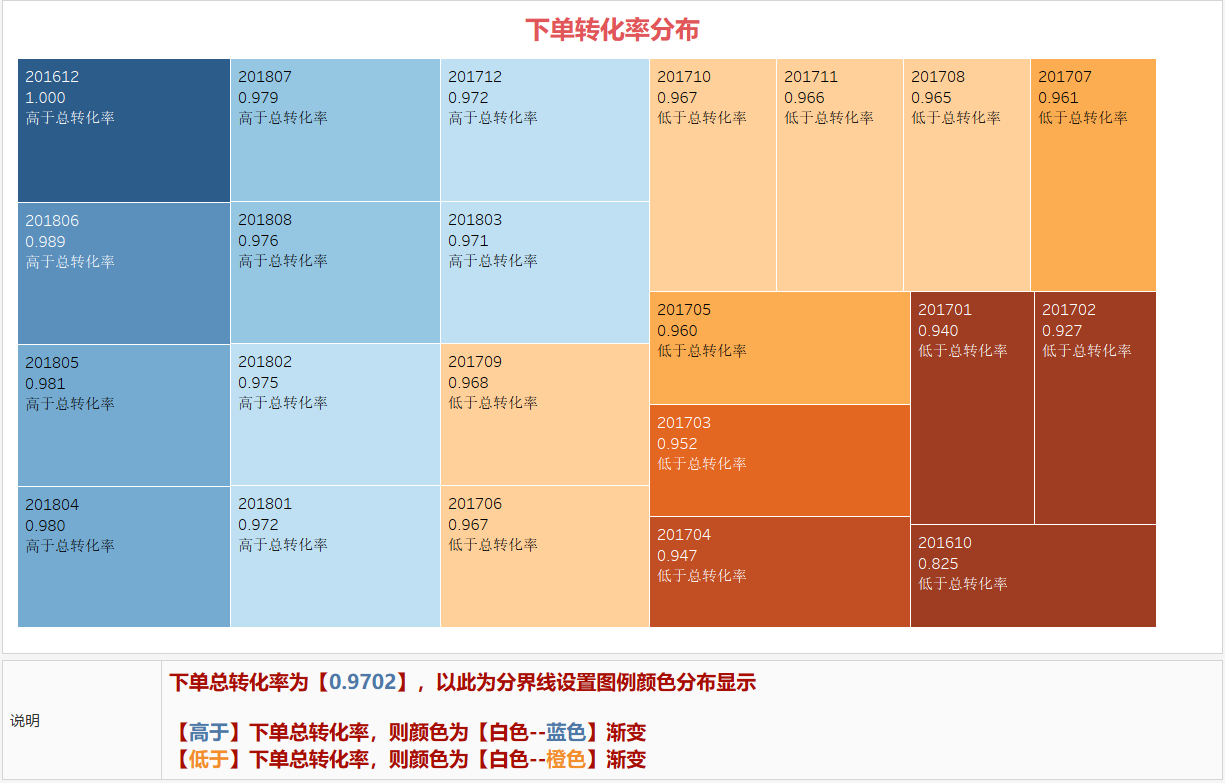

In [98]:
from IPython.display import Image
Image(filename='permonth_conversion_rate.png')

In [99]:
h4=h2.join(pd.DataFrame(d3['permonth_conversion_rate']),how='left')
h4.head()

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU,bymonth_change,permonth_conversion_rate
order_year_month,,,,,,
201609,NaN,NaN,NaN,NaN,,0.000000
201610,58838.24,339.0,321.0,98.298025,normal_change,0.824561
201612,-59070.86,-341.0,-323.0,-162.758025,normal_change,1.000000
201701,138468.42,849.0,799.0,153.490050,normal_change,0.940000
201702,153419.97,1036.0,980.0,-9.116786,abnormal_change,0.927359


In [100]:
h4['rate_combination']=''
for i in range(h4.shape[0]):
    if h4['permonth_conversion_rate'].iloc[i]>=total_conversion_rate:
        h4['rate_combination'].iloc[i]='高于整体转化率'
    else:
        h4['rate_combination'].iloc[i]='低于整体转化率'
h4

,bymonth_totalpayment,bymonth_ordernum,bymonth_unique_customer_num,bymonth_ARPU,bymonth_change,permonth_conversion_rate,rate_combination
order_year_month,,,,,,,
201609,NaN,NaN,NaN,NaN,,0.000000,低于整体转化率
201610,58838.24,339.0,321.0,98.298025,normal_change,0.824561,低于整体转化率
201612,-59070.86,-341.0,-323.0,-162.758025,normal_change,1.000000,高于整体转化率
201701,138468.42,849.0,799.0,153.490050,normal_change,0.940000,低于整体转化率
201702,153419.97,1036.0,980.0,-9.116786,abnormal_change,0.927359,低于整体转化率
201703,157955.59,951.0,902.0,3.741113,normal_change,0.951710,低于整体转化率
201704,-32075.57,-266.0,-278.0,6.054321,abnormal_change,0.947491,低于整体转化率
201705,175130.79,1373.0,1296.0,-13.540368,abnormal_change,0.960193,低于整体转化率
201706,-81642.44,-508.0,-455.0,-2.690123,normal_change,0.967113,低于整体转化率


In [101]:
h5=pd.DataFrame(h4[['bymonth_change','rate_combination']])
h5

,bymonth_change,rate_combination
order_year_month,,
201609,,低于整体转化率
201610,normal_change,低于整体转化率
201612,normal_change,高于整体转化率
201701,normal_change,低于整体转化率
201702,abnormal_change,低于整体转化率
201703,normal_change,低于整体转化率
201704,abnormal_change,低于整体转化率
201705,abnormal_change,低于整体转化率
201706,normal_change,低于整体转化率


In [102]:
h_abnormal_rate=h5[(h5['rate_combination']=='高于整体转化率')&(h5['bymonth_change']=='abnormal_change')].shape[0]/h5[h5['rate_combination']=='高于整体转化率'].shape[0]
h_abnormal_rate

0.2

In [103]:
print('当月下单转化率【高于】整体转化率时，出现异常数值变动的比例为：'+str(h_abnormal_rate))

当月下单转化率【高于】整体转化率时，出现异常数值变动的比例为：0.2


In [104]:
l_abnormal_rate=h5[(h5['rate_combination']=='低于整体转化率')&(h5['bymonth_change']=='abnormal_change')].shape[0]/h5[h5['rate_combination']=='低于整体转化率'].shape[0]
l_abnormal_rate

0.4666666666666667

In [105]:
print('当月下单转化率【低于】整体转化率时，出现异常数值变动的比例为：'+str(l_abnormal_rate))

当月下单转化率【低于】整体转化率时，出现异常数值变动的比例为：0.4666666666666667


★ 对比可知：当月下单转化率【高于】整体转化率时，出现异常数值变动的比例<<当月下单转化率【低于】整体转化率时出现异常数值变动的比例

因此，【提高下单转化率】也成为减少异常数值变动的重要控制因素

为此，尤其需要对【表格数据以外】的相应重要点击事件设置埋点+做好监控分析工作

对于重要点击事件，可以单独梳理、统一上报：比如

●Banner位点击

●Icon位点击

●各页面主要点击

●各业务流程点击

各业务主流程常见主要包括：

●页面浏览

●加入购物车

●立即购买

●收藏

●提交订单

●支付订单

通过漏斗模型，对于常见业务场景，例如：

●推广拉新

●产品体验

●资源位运营

●内容运营

●客户运营

●活动运营

●商户运营

等环节，进行营销政策上的优化、调整

In [106]:
j1=df1.join(pd.DataFrame(df2['order_status']),how='left')
j1.reset_index(inplace=True)
j1.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,delivered
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,delivered


In [107]:
j2=pd.DataFrame(j1[j1['order_status']=='delivered'].groupby('payment_type')['order_status'].count()/j1.groupby('payment_type')['order_status'].count())
j2.rename(columns={'order_status':'bypaytype_CVR'},inplace=True)
j2

,bypaytype_CVR
payment_type,
boleto,0.970026
credit_card,0.971235
debit_card,0.971877
not_defined,NaN
voucher,0.951169


★ 对比总体下单转化率0.9702来说，问题较大的在选择voucher（优惠券）方式进行支付时转化率差得较大（整整少了快2%）

这从常规逻辑来看，选择优惠券，对订单应付金额有所减少，照理来说下单转化率应该上升，结果反而下降了，这是不合常理的

首先列举出常见的电商平台优惠券类型：新人优惠券、满减优惠券、跨店优惠券、节假日优惠券、品类优惠券、无门槛（通用）优惠券

外部环境：

①竞品在做活动（给到的优惠券减免力度更大、福利更多）

②特殊事件影响（疫情导致小区不让派送快递无法签收，故选择退货）

③国家政策影响（例如之前严打挖矿但有厂商带头挖矿导致矿卡泛滥的消息，导致已经发货的订单被退回）

内部环境：

一、用户使用券之前：

最有可能的就是优惠券的发放匹配环节出了问题（给对应的客户发放了不合适的优惠券）：涉及到精准发券问题

这种情况可以从客户类型着手逆向思考：

①纠结型客户（货比N家，觉得选中的这件商品最满意（质量更高、功能更全、售后服务更完善等），但是价格有些超出预算），这类客户常见的会在商品详情页面点击、返回按钮、购物车加减按钮、APP退出、启动等事件上频率增加

②高意向用户（对于商品很满意，即使没有优惠券也会买）

③潜在流失用户（之前属于平台重度用户，因其他原因打算换电商平台使用）

二、用户使用券之后：

① 使用优惠券后应付金额低于免运费金额标准，导致运费高出优惠券减免金额

② 新用户和老用户的优惠券发放政策差异过大，导致用户产生对平台的voucher支付的抵触心理（大数据杀熟）

③ 使用优惠券后应付金额低于货到付款金额标准，导致货到付款订单无法提交

④ 不同种优惠券无法叠加使用（或者是叠加使用的限制条件太多）

将优惠券类型与券的发放到使用环节相结合进行分析，可能的几种问题情形：

①纠结型用户，很大概览本身用户只想购买这一件商品，所以更看重对该商品的优惠券优惠力度情况，结果平台给发了跨店优惠券、满减优惠券

②高意向用户 1st：急需该商品，结果发了个节假日优惠券 2nd：非急需：结果发了跨店优惠券、满减优惠券，但用户发现跨店和满减未找到自己需要的其他商品（或找到的需要的搭配商品价格太贵，超出预算）

③潜在流失用户：发放的优惠券减免力度不如其他平台、限制条件太多不能叠加使用

针对以上的可能原因，可采取如下改进措施：

一、用户使用券之前：

发券环节进行用户聚类，对用户进行更为详细的拆分和用户画像，最终和PM商讨发券方案，做到精准发券

二、用户使用券之后：

① 向下调低免运费门槛（或者调低运费）

② 减少新老用户优惠券发放的规则差异性

③ 降低货到付款的金额门槛

④ 减少叠加使用的限制条件，简化叠加使用需满足要求的说明

# 七、汇总

# 流程：
1、求出GMV、订单数、ARPU、顾客量的分布情况（按月）

2、根据RFM模型原理，对客户进行质量评分（黏性、忠诚度、消费能力、总评分）

3、对顾客按照地理位置（所属州）进行用户画像，找到各州的顾客质量分布情况

4、对下单流程转化率变化进行漏斗分析

5、分位数分析法，找出对应用户流失周期，以便后续进行预警等相关设置调整

6、对绘制的Tableau展板数据图形进行进一步分析研究

# 对流程中的第6步进行研究结果总结：

1st：对流程中第1步求出的GMV、订单数、ARPU、顾客量的分布情况（按月）进行diff操作，找出出现异常数据波动的月份

2nd：

★ Situation A：在1st中，bymonth_ARPU的diff为负,其余3值的diff为正的月份，说明当月【GMV增长率落后于顾客量增长率】

★ Situation B：在1st中，bymonth_ARPU的diff为正,其余3值的diff为负的月份，说明当月【顾客量下降率要高于GMV下降率】

3rd：求出总体的用户复购率为4%（太低）

4th：从p14可以看出，总体来看，【Frequency（购物频率）问题最大】，需要对该购物网站的用户进行提高活跃度与依赖性的改进

1.从平台自身角度，可以进行浇水等小游戏兑换积分或者优惠券

2.从商品展示到销售以及最后的售后一整套环节出发

【售前】由平台加大对产品质量和价格方面的综合权衡把关（做好品控），官方自营店、出台严厉的售假惩罚措施

【售中】与合作物流公司加强对商品运输途中的监控，保证消费者可以第一时间获得商品相关物流信息

【售后】写带图评价并审核通过优质标准的，给予一定奖励

A.如果消费者对商品有任何不满，经核实是商家或者平台过错做好退款、退货和安抚客户情绪工作

B.如果核实是消费者自己的过错，那就由他自行承担

给巴西各州的用户画像分布分析来看，评分【高于中位数】的客户『高于』评分【低于中位数】的客户的州仅有5个，占比仅为18.5%，问题较大！

因此，前期营销政策调整重点应【优先攻克其余22个州】，联系对应分项目区的PM与之商讨对应的营销政策调整方案。

5th：对比可知：当月下单转化率【高于】整体转化率时，出现异常数值变动的比例<<当月下单转化率【低于】整体转化率时出现异常数值变动的比例

因此，【提高下单转化率】也成为减少异常数值变动的重要控制因素

6th：对比不同支付方式转化率的差异可知，使用voucher的转化率却低于总体转化率近2%（问题最大）

7th：基于6th的分析结果，从常规逻辑来看，选择优惠券，对订单应付金额有所减少，照理来说下单转化率应该上升，结果反而下降了，这是不合常理的

8th：分析7th的结果来看，可能的原因如下：

首先列举出常见的电商平台优惠券类型：新人优惠券、满减优惠券、跨店优惠券、节假日优惠券、品类优惠券、无门槛（通用）优惠券

外部环境：

①竞品在做活动（给到的优惠券减免力度更大、福利更多）

②特殊事件影响（疫情导致小区不让派送快递无法签收，故选择退货）

③国家政策影响（例如之前严打挖矿但有厂商带头挖矿导致矿卡泛滥的消息，导致已经发货的订单被退回）

内部环境：

一、用户使用券之前：

最有可能的就是优惠券的发放匹配环节出了问题（给对应的客户发放了不合适的优惠券）：涉及到精准发券问题

这种情况可以从客户类型着手逆向思考：

①纠结型客户（货比N家，觉得选中的这件商品最满意（质量更高、功能更全、售后服务更完善等），但是价格有些超出预算），这类客户常见的会在商品详情页面点击、返回按钮、购物车加减按钮、APP退出、启动等事件上频率增加

②高意向用户（对于商品很满意，即使没有优惠券也会买）

③潜在流失用户（之前属于平台重度用户，因其他原因打算换电商平台使用）

二、用户使用券之后：

① 使用优惠券后应付金额低于免运费金额标准，导致运费高出优惠券减免金额

② 新用户和老用户的优惠券发放政策差异过大，导致用户产生对平台的voucher支付的抵触心理（大数据杀熟）

③ 使用优惠券后应付金额低于货到付款金额标准，导致货到付款订单无法提交

④ 不同种优惠券无法叠加使用（或者是叠加使用的限制条件太多）

将优惠券类型与券的发放到使用环节相结合进行分析，可能的几种问题情形：

①纠结型用户，很大概览本身用户只想购买这一件商品，所以更看重对该商品的优惠券优惠力度情况，结果平台给发了跨店优惠券、满减优惠券

②高意向用户 1st：急需该商品，结果发了个节假日优惠券 2nd：非急需：结果发了跨店优惠券、满减优惠券，但用户发现跨店和满减未找到自己需要的其他商品（或找到的需要的搭配商品价格太贵，超出预算）

③潜在流失用户：发放的优惠券减免力度不如其他平台、限制条件太多不能叠加使用

9th：针对8th中的可能原因，可采取如下改进措施：

对于unavailable（订单获取失败）的情况，改进措施如下：

大部分是系统问题（如服务器负载量过大、数据传输返回通道故障等），需要技术部门的同事对系统进一步优化以降低异常情况的发生概率

对于canceled（取消订单）的情况，改进措施如下：

一、用户使用券之前：

发券环节进行用户聚类，对用户进行更为详细的拆分和用户画像，最终和PM商讨发券方案，做到精准发券

二、用户使用券之后：

① 向下调低免运费门槛（或者调低运费）

② 减少新老用户优惠券发放的规则差异性

③ 降低货到付款的金额门槛

④ 减少叠加使用的限制条件，简化叠加使用需满足要求的说明

这样可以从created（下单）->processing（审单）->approved（审核通过）->invoiced（开发票）->shipped（发货）-> delivered（送达）这一整套流程中提高转化率